# toolbox.plot

<div class="alert alert-block alert-info">
View interactive version on <a href="https://nbviewer.org/github/janjoch/toolbox/blob/main/demo/toolbox.plot.ipynb">NBViewer</a>!
</div>

### Import section

In [1]:
import sys

sys.path.insert(0, r"..")

import toolbox as tb

In [2]:
import datetime as dt

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

In [3]:
import plotly.offline
plotly.offline.init_notebook_mode()

### Enhance a function

In [4]:
@tb.plot.magic_plot
def plot(*xy, fig=None, **kwargs):
    fig.add_line(*xy, **kwargs)

In [5]:
plot([0,4,6,7], [1,2,4,8])

D:\Code\toolbox\demo\..\toolbox\plot.py:408: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



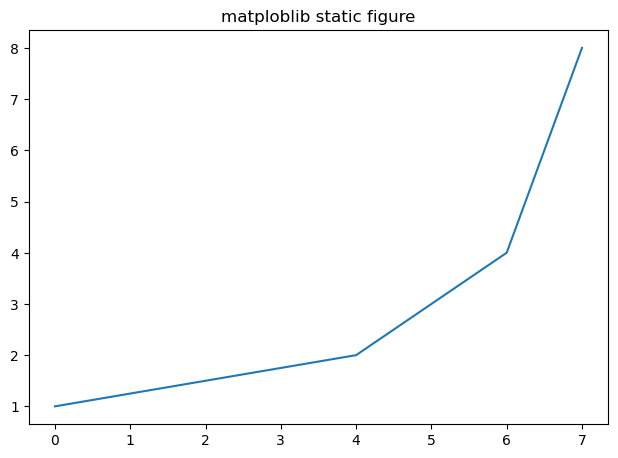

In [6]:
plot([0,4,6,7], [1,2,4,8], interactive=False, title="matploblib static figure")

In [7]:
# function must accept the keyword argument fig
# the only thing the function has to do, is to call fig.add_line
@tb.plot.magic_plot_preset(title="Normally Distributed Noise", ylabel="Amplitude")
def plot_lines(samples=200, n=10, label="sigma={0}, mu={1}", fig=None):
    """
    Plot a line!

    Parameters
    ----------
    samples: int, optional
        Default 200
    n: int, optional
        Number of traces.
        Default: 10
    label: str, optional
        Trace label. May contain {0} for sigma and {1} for mu values.
        Default: "sigma={0}, mu={1}"
    [decorator parameters will be added automatically]
    """
    for i in range(1, n+1):
        fig.add_line(np.random.normal(i*10,i,samples), label=label.format(i, i*10))

In [8]:
# function now accepts its own arguments,
# and plot-styling arguments
plot_lines()

saved figure at exports/normally_distributed_noise.png


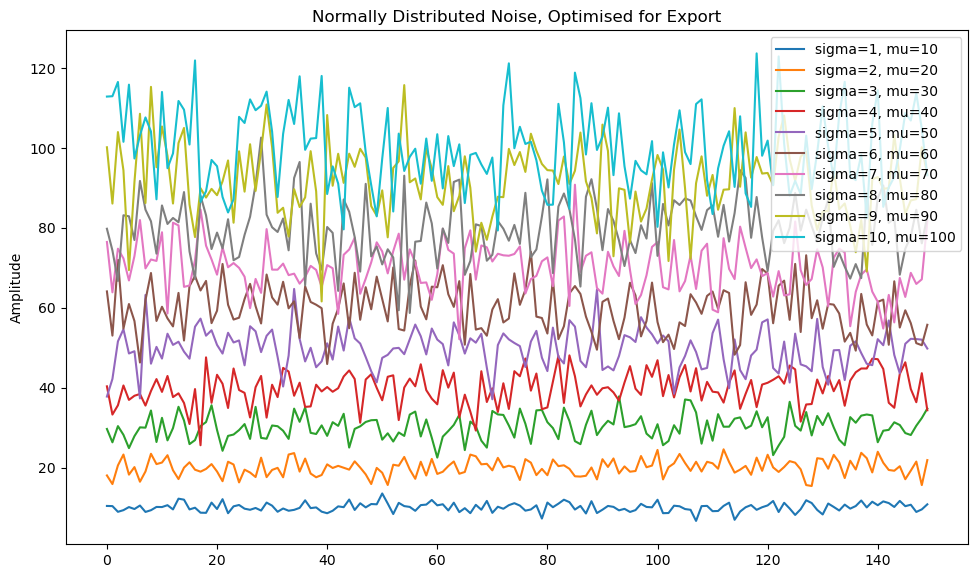

In [9]:
# function now accepts their own arguments,
# and plot-styling arguments
plot_lines(
    samples=150,
    interactive=False,
    title="Normally Distributed Noise, Optimised for Export",
    fig_size=(10,6),
    save_fig="exports/normally_distributed_noise.png",
)

In [10]:
@tb.plot.magic_plot
def plot_hists(samples=200, n=10, label="sigma={0}, mu={1}", fig=None, **kwargs):
    """
    Plot a line!

    Parameters
    ----------
    samples: int, optional
        Default 200
    n: int, optional
        Number of traces.
        Default: 10
    label: str, optional
        Trace label. May contain {0} for sigma and {1} for mu values.
        Default: "sigma={0}, mu={1}"
    [decorator parameters will be added automatically]
    """
    for i in range(1, n+1):
        fig.add_hist(np.random.normal(i*10,i,samples), label=label.format(i, i*10), **kwargs)

In [11]:
plot_hists(samples=10000, n=5, title="It really is normally distributed!")

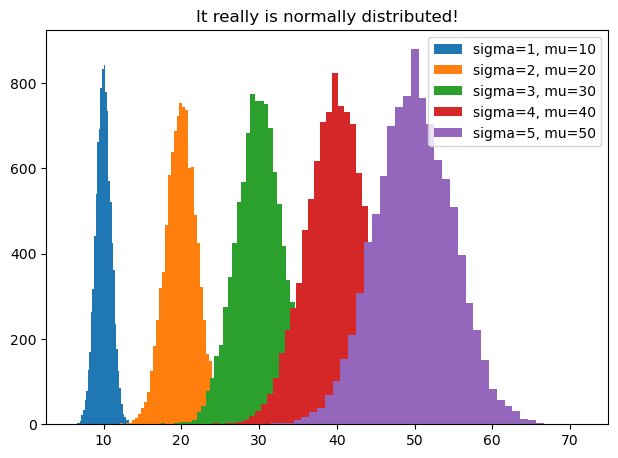

In [12]:
plot_hists(samples=10000, n=5, interactive=False, title="It really is normally distributed!", bins=40)

In [13]:
@tb.plot.magic_plot
def plot_heatmap(shape=(10,20), fig=None, **kwargs):
    fig.add_heatmap(np.random.normal(0, 1, shape), **kwargs)

In [14]:
plot_heatmap(title="Heatmap")

### Enhance class methods

In [15]:
class SignalAnalysis(tb.plot.NotebookInteraction):
    # thanks to tb.plot.NotebookInteraction,
    # show() or plot() (fallback) will be called automatically
    # to display data in a notebook setting,
    # if the instance is referenced.
    """A generic example to import (aka simulate) and show data easily."""

    def __init__(self, samples=1000):
        # read or simulate your data
        self.data = np.random.normal(0,1,samples)
        self.index = pd.date_range(dt.datetime.now() - dt.timedelta(seconds=samples), dt.datetime.now(), samples)

    @tb.plot.magic_plot
    def plot(self, fig, **kwargs):
        """
        Show the raw trace.

        Provide styling information manually.

        Parameters
        ----------
        [decorator parameters will be added automatically]
        """
        fig.add_line(self.index, self.data, **kwargs)

    @tb.plot.magic_plot_preset(title="Demo Signal Analysis", xlabel="timestamp / UTC", ylabel="Amplitude")
    def show(self, fig, **kwargs):
        """
        Show the default styled plot.

        Parameters
        ----------
        [decorator parameters will be added automatically]
        """
        fig.add_line(self.index, self.data, **kwargs)

    @tb.plot.magic_plot
    def hist(self, fig, **kwargs):
        """
        Show the histogram of the data.

        Parameters
        ----------
        [decorator parameters will be added automatically]
        """
        fig.add_hist(self.data, **kwargs)

    @tb.plot.magic_plot
    def plot_combined(self, fig, **kwargs):
        """
        Show the line plot and histogram in one plot.

        Parameters
        ----------
        [decorator parameters will be added automatically]
        """
        fig.add_line(self.data, **kwargs)
        fig.add_hist(y=self.data, **kwargs)

    # by setting strict_preset=True, disable user override of the presets
    @tb.plot.magic_plot_preset(interactive=False, strict_preset=True)
    def plot_static(self, fig, **kwargs):
        """
        Enforced static matplotlib plot.

        Useful for repeatable outcomes and clean image exports.

        Parameters
        ----------
        [decorator parameters will be added automatically]
        """
        fig.add_line(self.index, self.data, **kwargs)

    # by setting strict_preset=True, disable user override of the presets
    @tb.plot.magic_plot_preset(
        interactive=True,
        title="strictly plotly!",
        xlabel="X axis",
        ylim=(-5, 5),
        strict_preset=True,
    )
    def plot_interactive(self, fig, **kwargs):
        """
        Enforced dynamic plot.

        Useful if manual styling only works with the plotly API.

        Parameters
        ----------
        [decorator parameters will be added automatically]
        """
        fig.add_line(self.index, self.data, **kwargs)


In [16]:
# import data (aka simulation)
signal = SignalAnalysis()

In [17]:
# quick-and-dirty sneak peek
# thanks to tb.plot.NotebookInteraction parent class
signal

In [18]:
signal.plot()

In [19]:
signal.plot(title="Manually Zoomed Out", ylim=(-10,10))

In [20]:
signal.hist()

D:\Code\toolbox\demo\..\toolbox\plot.py:408: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



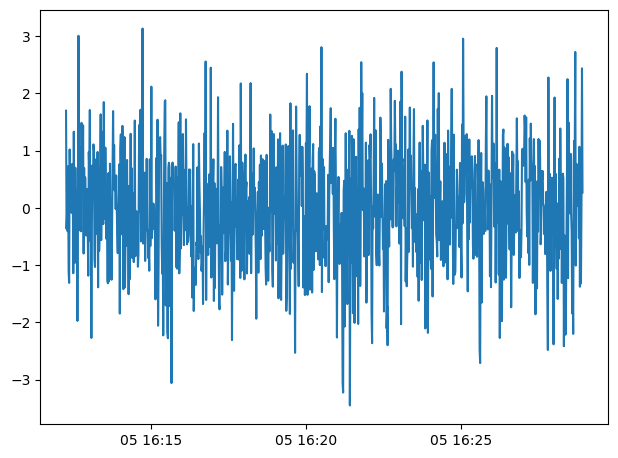

In [21]:
signal.plot_static()

In [22]:
signal.plot_interactive()

In [23]:
# overriding strictly set presets will throw an error
try:
    signal.plot_interactive(title="updated manually")
except ValueError as error:
    print("ValueError was thrown:")
    print(error)

ValueError was thrown:
Keyword argument 'title' cannot be set.
Overriding keyword arguments was deactivated with strict_preset=True in the decorator function.


In [24]:
signal.plot_combined()

In [25]:
# control all of plotly by passing keyword argumends for plotly's fig.update_layout
signal.hist(
    title="Fully controllable layout!",
    pty_update_layout=dict(plot_bgcolor="black")
)

In [26]:
# take even more control with the custom function
def pty_custom_func(fig):
    fig.update_traces(opacity=0.25)
    return fig

signal.hist(
    title="Custom Plotly Function",
    pty_custom_func=pty_custom_func,
)

saved figure at exports/custom_matplotlib.png


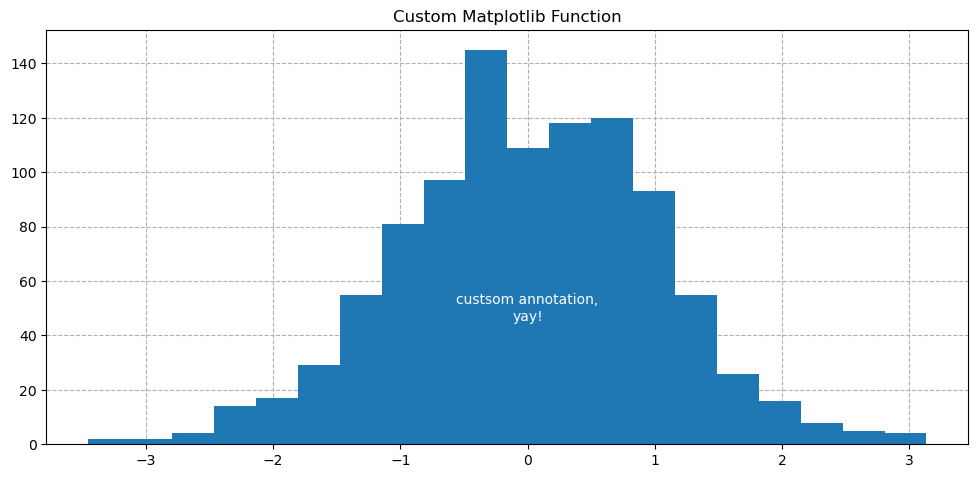

In [27]:
# take even more control with the custom function
def mpl_custom_func(fig, ax):
    ax.set_axisbelow(True)
    ax.text(0, 50, "custsom annotation,\nyay!",
        horizontalalignment="center",
        verticalalignment="center",
        color="white",
    )
    ax.grid(linestyle="--", zorder=10)
    return fig, ax

signal.hist(
    title="Custom Matplotlib Function",
    bins=20,
    fig_size=(10,5),
    interactive=False,
    mpl_custom_func=mpl_custom_func,
    save_fig="exports/custom_matplotlib.png",
)

In [28]:
# save plot
signal.show(save_fig="exports/signal_plotly.html")
signal.show(interactive=False, save_fig="exports/signal_mpl.png")
signal.show(save_fig="exports/signal_plotly.png")
plt.close()

saved figure at exports/signal_plotly.html
saved figure at exports/signal_mpl.png
saved figure at exports/signal_plotly.png
